In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [75]:
games = pd.read_csv("data/euroleague_games.csv")

In [77]:
games = games[["Season", "Part", "Round", "H_Team", "A_Team", "H_Score", "A_Score"]]
games = games[games["Part"] == "REGULAR SEASON"]
games["Round"] = games.Round.str.extract('(\d+)')[0].astype(int)
games["H_Win"] = np.where(games["H_Score"] > games["A_Score"], 1, 0)
games["A_Win"] = np.where(games["H_Score"] < games["A_Score"], 1, 0)
games["count"] = 1

In [163]:
def output_table(input_games, season, round_=None):
    games_season = input_games[input_games["Season"] == season]
    max_round = round_
    if not max_round:
        max_round = max(games_season["Round"])
    games_season = games_season[games_season["Round"] <= max_round]

    table_home = games_season.groupby("H_Team").sum()[["H_Score", "A_Score", "H_Win", "count"]].reset_index()
    table_home = table_home.rename(columns={"H_Team": "Team", "H_Score": "Score", "A_Score": "Opponent_Score", "H_Win": "Win"})

    table_away = games_season.groupby("A_Team").sum()[["H_Score", "A_Score", "A_Win", "count"]].reset_index()
    table_away = table_away.rename(columns={"A_Team": "Team", "A_Score": "Score", "H_Score": "Opponent_Score", "A_Win": "Win"})

    table = pd.concat([table_home, table_away]).groupby(['Team']).sum().sort_values("Win", ascending=False).reset_index()

    table["Season"] = season
    table["W_ratio"] = table["Win"] / table["count"]
    table["pyth_classic"] = table["Score"] ** 2 / (table["Score"] ** 2 + table["Opponent_Score"] ** 2)
    table["pyth_el"] = table["Score"] ** 11.014 / (table["Score"] ** 11.014 + table["Opponent_Score"] ** 11.014)
    return table

In [164]:
table_2016_2017 = output_table(games, season="2016/17", round_=30)
table_2017_2018 = output_table(games, season="2017/18", round_=30)

(0.840221202391185, 0.07837736502873012)

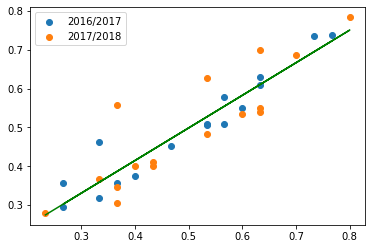

In [168]:
table_concat = pd.concat([table_2016_2017, table_2017_2018])
plt.scatter(table_2016_2017["W_ratio"], table_2016_2017["pyth_el"], label="2016/2017")
plt.scatter(table_2017_2018["W_ratio"], table_2017_2018["pyth_el"], label="2017/2018")
#obtain m (slope) and b(intercept) of linear regression line
m, b  = np.polyfit(table_concat["W_ratio"], table_concat["pyth_el"], 1)

#add linear regression line to scatterplot
plt.plot(table_concat["W_ratio"], m * table_concat["W_ratio"] + b, color="green")
plt.legend()
m, b

In [169]:
table_concat["W_ratio"].corr(table_concat["pyth_el"])

0.9176407378588708

In [170]:
table_concat

,Team,Score,Opponent_Score,Win,count,Season,W_ratio,pyth_classic,pyth_el
0,Real Madrid,2585,2353,23,30,2016/17,0.766667,0.546879,0.738018
1,CSKA Moscow,2619,2387,22,30,2016/17,0.733333,0.546245,0.735285
2,Olympiacos Piraeus,2338,2227,19,30,2016/17,0.633333,0.524301,0.630818
3,Panathinaikos Superfoods Athens,2326,2234,19,30,2016/17,0.633333,0.520167,0.609327
4,Fenerbahce Istanbul,2286,2244,18,30,2016/17,0.600000,0.509271,0.550883
5,Anadolu Efes Istanbul,2521,2512,17,30,2016/17,0.566667,0.501788,0.509846
6,Baskonia Vitoria Gasteiz,2445,2376,17,30,2016/17,0.566667,0.514309,0.578177
7,Crvena Zvezda mts Belgrade,2209,2204,16,30,2016/17,0.533333,0.501133,0.506239
8,Darussafaka Dogus Istanbul,2373,2366,16,30,2016/17,0.533333,0.501477,0.508134
9,Zalgiris Kaunas,2350,2391,14,30,2016/17,0.466667,0.491353,0.452518


In [140]:
from scipy.optimize import fmin_l_bfgs_b

In [157]:
def pyth_fun(x):
    x = x[0]
    return np.sum((table_concat["W_ratio"] - table_concat["Score"] ** x / (table_concat["Score"] ** x + table_concat["Opponent_Score"] ** x)) ** 2)

In [161]:
x, f, d = fmin_l_bfgs_b(func=pyth_fun, x0=np.array([2]), approx_grad=True)

In [162]:
x

array([11.01392807])

In [171]:
table_2018_2019_half = output_table(games, season="2018/19", round_=15)

In [172]:
table_2018_2019_half

,Team,Score,Opponent_Score,Win,count,Season,W_ratio,pyth_classic,pyth_el
0,Fenerbahce Beko Istanbul,1254,1120,14,15,2018/19,0.933333,0.556266,0.776379
1,Real Madrid,1312,1140,12,15,2018/19,0.800000,0.569803,0.824587
2,CSKA Moscow,1327,1243,11,15,2018/19,0.733333,0.532650,0.672659
3,Anadolu Efes Istanbul,1292,1236,9,15,2018/19,0.600000,0.522141,0.619645
4,Olympiacos Piraeus,1209,1155,9,15,2018/19,0.600000,0.522831,0.623226
5,FC Barcelona Lassa,1143,1152,8,15,2018/19,0.533333,0.496078,0.478417
6,FC Bayern Munich,1207,1212,8,15,2018/19,0.533333,0.497933,0.488619
7,AX Armani Exchange Olimpia Milan,1289,1285,7,15,2018/19,0.466667,0.501554,0.508557
8,KIROLBET Baskonia Vitoria-Gasteiz,1212,1210,7,15,2018/19,0.466667,0.500826,0.504547
9,Panathinaikos OPAP Athens,1192,1202,7,15,2018/19,0.466667,0.495823,0.477013
